In [1]:
import os
import pickle
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
import soundfile as sf
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Features Using For Classification.**
1. Mcc 
2. chroma_stft
3. chroma_cqt
4. tonnetz
5. melspectrogram
6. spectral_centroid
7. spectral_contrast

In [2]:
def extract_features(x, path):
    X, sample_rate = sf.read(path, dtype='float32')
    # Mcc
    Mcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=47)
    Mcc = np.mean(Mcc.T, axis=0)
    # chroma_stft
    chroma_stft = librosa.feature.chroma_stft(y=X, sr=sample_rate,n_chroma=12, n_fft=4096)
    chroma_stft = np.mean(chroma_stft.T, axis=0)
    # chroma_cqt
    chroma_cqt = librosa.feature.spectral_bandwidth(y=X, sr=sample_rate)
    chroma_cqt = np.mean(chroma_cqt.T, axis=0)
    # tonnetz
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate, chroma=chroma_cqt)
    # melspectrogram
    melspectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    melspectrogram = np.mean(melspectrogram.T, axis=0)
    # spectral_centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=X, sr=sample_rate)
    spectral_centroid = np.mean(spectral_centroid.T, axis=0)
    # spectral_contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
    spectral_contrast = np.mean(spectral_contrast.T, axis=0)
    feature = np.hstack((Mcc, chroma_stft, chroma_cqt, melspectrogram, spectral_centroid, spectral_contrast, tonnetz))
    x.append(feature)

In [3]:
def LabelEncoder(arr, le):
    le.fit(arr)
    print(le.classes_)
    Y = le.fit_transform(arr)
    return Y

In [4]:
X_train = []
Y_train = []

Train_Data = ['Train/Angry/', 'Train/Happy/', 'Train/Neutral/', 'Train/Sad/']
for path in Train_Data:
    for file in os.listdir(path):
        print('*', end='')
        file_path = path+file
        extract_features(X_train, file_path)
        Y_train.append(file_path.split('/')[1])
    print('\nFeatures Extract From',path,'Completed!')

X_train = np.array(X_train)
Y_train = np.array(Y_train)
print('\nX Train Shape : ', X_train.shape)
print('Y Train Shape : ', Y_train.shape)

*************************************************************************************
Features Extract From Train/Angry/ Completed!
****************************************************************************************************
Features Extract From Train/Happy/ Completed!
****************************************************************************************************
Features Extract From Train/Neutral/ Completed!
****************************************************************************************************
Features Extract From Train/Sad/ Completed!

X Train Shape :  (385, 202)
Y Train Shape :  (385,)


In [5]:
le = preprocessing.LabelEncoder()
Y_Train = LabelEncoder(Y_train, le)

['Angry' 'Happy' 'Neutral' 'Sad']


In [6]:
X_test = []
Y_test = []

Test_Data = ['Test/Angry/', 'Test/Happy/', 'Test/Neural/', 'Test/Sad/']
for path in Test_Data:
    for file in os.listdir(path):
        print('*', end='')
        file_path = path+file
        extract_features(X_test, file_path)
        Y_test.append(file_path.split('/')[1])
    print('\nFeatures Extract From',path,'Completed!')
    
X_test = np.array(X_test)
Y_test = np.array(Y_test)
print('\nX Test Shape : ', X_test.shape)
print('Y Test Shape : ', Y_test.shape)

***************
Features Extract From Test/Angry/ Completed!
***************
Features Extract From Test/Happy/ Completed!
***************
Features Extract From Test/Neural/ Completed!
***************
Features Extract From Test/Sad/ Completed!

X Test Shape :  (60, 202)
Y Test Shape :  (60,)


In [7]:
Y_Test = LabelEncoder(Y_test, le)

['Angry' 'Happy' 'Neural' 'Sad']


In [8]:
model = SVC(kernel='linear', gamma=0.001, C=1)
model.fit(X_train, Y_Train)

SVC(C=1, gamma=0.001, kernel='linear')

In [9]:
pickle.dump(model, open('SVC_Model.sav', 'wb'))

In [10]:
model_SVC = pickle.load(open('SVC_Model.sav', 'rb'))

In [11]:
X = np.concatenate((X_train, X_test))
shape = X.shape[1]
print('X Shape : ',X.shape)
left = X[:, :int(shape/2)]
right = X[:, int(shape/2):]
print('Left Shape Before Mean : ',left.shape)
print('Right Shape Before Mean : ',right.shape)
left = np.mean(left, axis=1)
right = np.mean(right, axis=1)
print('Left Shape After Mean : ',left.shape)
print('Right Shape After Mean : ',right.shape)

Y = np.concatenate((Y_Train, Y_Test))
print('Y Shape : ',Y.shape)

X Shape :  (445, 202)
Left Shape Before Mean :  (445, 101)
Right Shape Before Mean :  (445, 101)
Left Shape After Mean :  (445,)
Right Shape After Mean :  (445,)
Y Shape :  (445,)


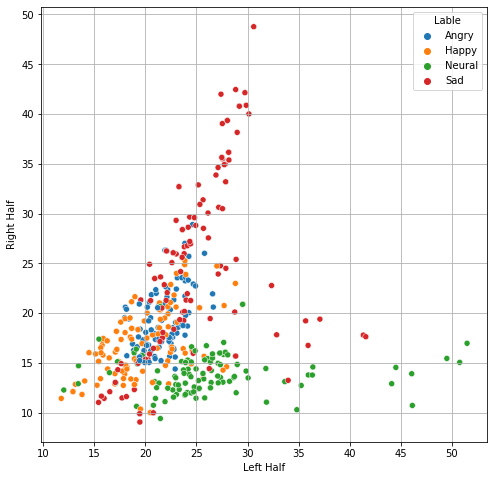

In [12]:
data = {
    'Left Half' : left,
    'Right Half' : right,
    'Lable' : le.inverse_transform(Y)
}
plt.figure(figsize=(8,8))
sns.scatterplot(data=data, x='Left Half', y='Right Half', hue='Lable')
plt.grid(True)
plt.show()

In [13]:
Y_Predict = model_SVC.predict(X_test)
print('Y Predict :')
print(Y_Predict)
print('\nY Test :')
print(Y_Test)

Y Predict :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

Y Test :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [14]:
print(accuracy_score(Y_Predict, Y_Test)*100)
print('')
print(confusion_matrix(Y_Predict, Y_Test))
print('')
print(classification_report(Y_Predict, Y_Test))

100.0

[[15  0  0  0]
 [ 0 15  0  0]
 [ 0  0 15  0]
 [ 0  0  0 15]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        15

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



## For Test > Sad > SM25_F34_S084.wav

In [15]:
X = []
path = 'Test/Sad/SM25_F34_S084.wav'
extract_features(X, path)
y_pre = model_SVC.predict(X)
le.inverse_transform(y_pre)

array(['Sad'], dtype='<U6')